# Keras CNN - CIFAR-10 Multiple Classification

- toc: true
- badges: False
- comments: true
- author: Sam Treacy
- categories: [Keras, CNN, Tensorflow, classification, python]

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [93]:
X_train.shape

(50000, 32, 32, 3)

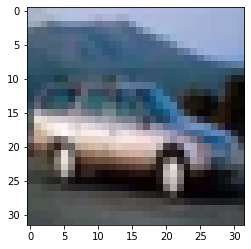

In [94]:
plt.imshow(X_train[4]);

# Normalise Data

In [95]:
X_train.max(), 

(255,)

In [96]:
X_train = X_train/255
X_test  = X_test/255

# Label Data

In [97]:
from tensorflow.keras.utils import to_categorical

In [98]:
y_train.max()

9

In [99]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test , 10)

# Build Model

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten

In [101]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10,  activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

In [104]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)

In [105]:
model.fit(X_train, y_train, epochs=20, batch_size=516,
          validation_data=(X_test, y_test),
          callbacks = [early_stop],
          verbose= 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 26s 526us/sample - loss: 1.9519 - accuracy: 0.3024 - val_loss: 2.1164 - val_accuracy: 0.2693
Epoch 2/20
50000/50000 [==============================] - 24s 471us/sample - loss: 1.6544 - accuracy: 0.4150 - val_loss: 1.6044 - val_accuracy: 0.4418
Epoch 3/20
50000/50000 [==============================] - 22s 450us/sample - loss: 1.5079 - accuracy: 0.4694 - val_loss: 1.3855 - val_accuracy: 0.5176
Epoch 4/20
50000/50000 [==============================] - 24s 479us/sample - loss: 1.4067 - accuracy: 0.5047 - val_loss: 1.3563 - val_accuracy: 0.5168
Epoch 5/20
50000/50000 [==============================] - 24s 474us/sample - loss: 1.3298 - accuracy: 0.5361 - val_loss: 1.2736 - val_accuracy: 0.5526
Epoch 6/20
50000/50000 [==============================] - 24s 475us/sample - loss: 1.2627 - accuracy: 0.5588 - val_loss: 1.2547 - val_accuracy: 0.5565
Epoch 7/20
50000/50000 [====================

In [107]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

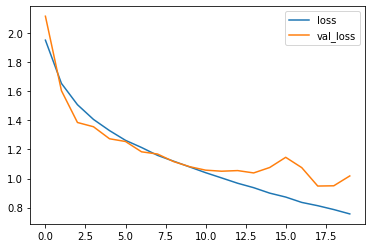

In [108]:
losses[['loss', 'val_loss']].plot()

<AxesSubplot:>

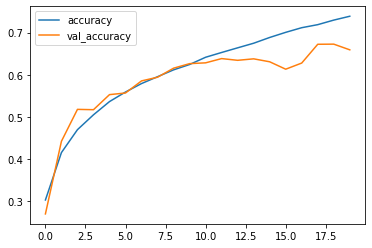

In [109]:
losses[['accuracy', 'val_accuracy']].plot()

In [110]:
model.metrics_names

['loss', 'accuracy']

In [111]:
print(model.metrics_names)
print(model.evaluate(X_test, y_test, verbose=0))

['loss', 'accuracy']
[1.0178816331863403, 0.659]


In [112]:
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
X_test.shape

(10000, 32, 32, 3)

In [114]:
predictions = model.predict_classes(X_test)

In [115]:
predictions

array([3, 8, 8, ..., 5, 4, 7])

In [116]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [117]:
y_test = y_test.argmax(axis=1)

In [118]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [119]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74      1000
           1       0.90      0.61      0.73      1000
           2       0.68      0.44      0.53      1000
           3       0.45      0.57      0.51      1000
           4       0.53      0.71      0.61      1000
           5       0.54      0.58      0.56      1000
           6       0.67      0.81      0.74      1000
           7       0.81      0.63      0.71      1000
           8       0.79      0.76      0.78      1000
           9       0.65      0.82      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.66     10000
weighted avg       0.69      0.66      0.66     10000



In [120]:
confusion_matrix(y_test, predictions)

array([[660,  14,  41,  40,  49,  18,  25,  11,  77,  65],
       [ 15, 607,   9,  30,  17,  17,  37,   3,  50, 215],
       [ 46,   2, 437, 112, 156,  95,  99,  29,  10,  14],
       [  5,   4,  41, 572,  98, 159,  76,  16,  10,  19],
       [  6,   2,  40,  84, 714,  35,  62,  40,  11,   6],
       [  5,   2,  18, 216,  86, 580,  46,  35,   3,   9],
       [  0,   1,  24,  72,  55,  22, 810,   8,   2,   6],
       [  7,   0,  13,  65, 131, 107,  13, 631,   4,  29],
       [ 34,  18,  13,  33,  32,  20,  17,   2, 759,  72],
       [ 15,  22,  10,  36,  21,  19,  19,   8,  30, 820]])

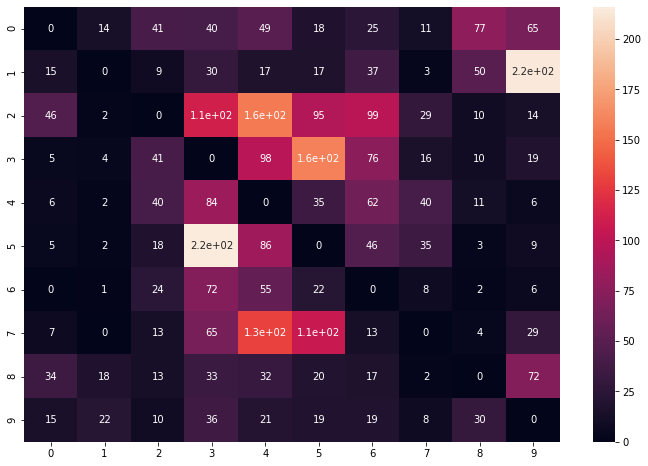

In [163]:
conf_matrix = confusion_matrix(y_test, predictions) * (np.ones((10,10)) - np.eye(10))


import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True);

# Predicing a specific image

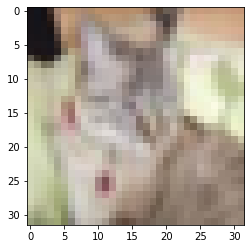

In [166]:
new_image = X_test[8]

plt.imshow(new_image);

In [165]:
model.predict_classes(new_image.reshape(1,32,32,3))

array([3])